In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
data = pd.read_csv('data/dataset_mood_smartphone.csv')
data.head(10)

,Unnamed: 0,id,time,variable,value
0,1,AS14.01,2014-02-26 13:00:00.000,mood,6.0
1,2,AS14.01,2014-02-26 15:00:00.000,mood,6.0
2,3,AS14.01,2014-02-26 18:00:00.000,mood,6.0
3,4,AS14.01,2014-02-26 21:00:00.000,mood,7.0
4,5,AS14.01,2014-02-27 09:00:00.000,mood,6.0
5,6,AS14.01,2014-02-27 12:00:00.000,mood,6.0
6,7,AS14.01,2014-02-27 15:00:00.000,mood,7.0
7,8,AS14.01,2014-03-21 09:00:00.000,mood,6.0
8,9,AS14.01,2014-03-21 11:00:00.000,mood,6.0
9,10,AS14.01,2014-03-21 15:00:00.000,mood,7.0


### Exploratory data analysis

#### Notes:
    - Step 1:
        - Arousal and Valence the same?
        - Some apps have a very high maximum duration of usage. Is this correct? Do they run in the background?
        - appCat.builtin and app.Cat entertainment have negative value for minimum duration. Cannot be right
        - Data types are fine
        - Outliers: a lot of outliers per category, especially in duration of usage variables
    - Step 2:
        - We have 46 and 156 NaNs for arousel and valence respectively
        - For duration of usage we see a lot of low duration times, skewing the data to the left a lot and producing a lot of outliers for high values
        - Distributions are often skewed to the left a lot
        - Depencies will be searched for after aggregation
        

##### Step 1: Data quality and logical structure

In [3]:
for var in data.variable.unique():
    var_data = data[data.variable == var].reset_index(drop=True)

    ########## Min - Max ###############
    # print('for {}, min: {} & max: {}'.format(var, var_data.value.min(), var_data.value.max()))

    ######### Data types ##############
    # print(var, var_data.dtypes)

    ######### First look at outliers ###########
    # plt.plot(var_data.value)
    # plt.title('{}'.format(var))
    # plt.show()
   



##### Step 2: Data exploration

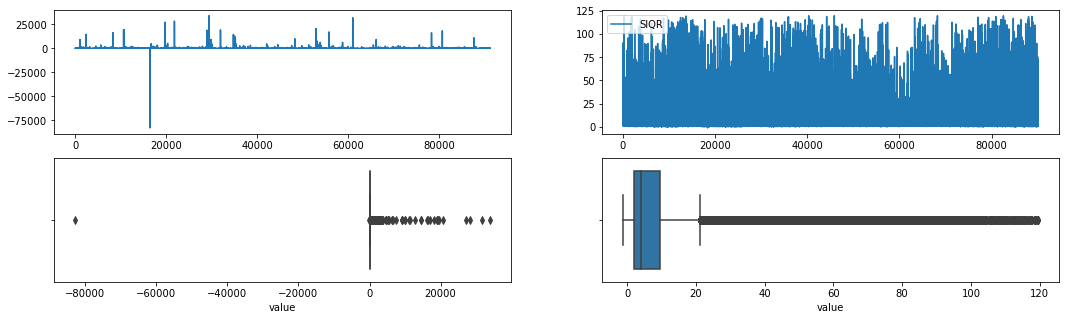

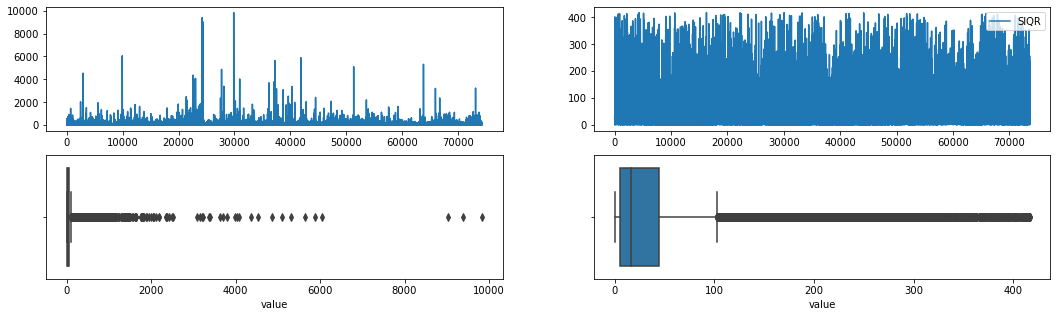

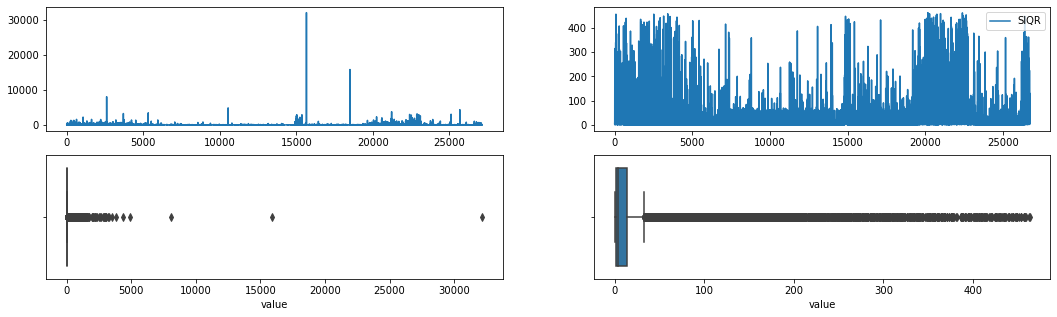

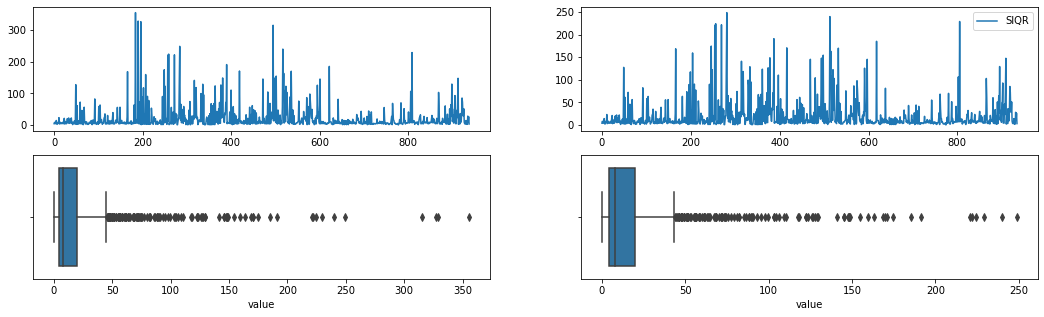

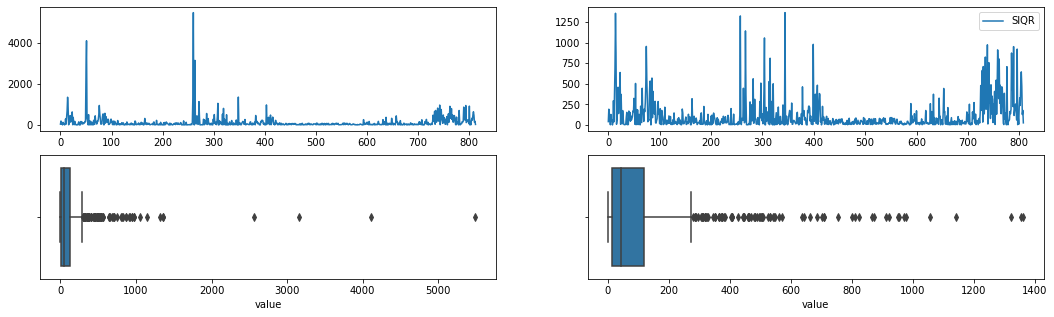

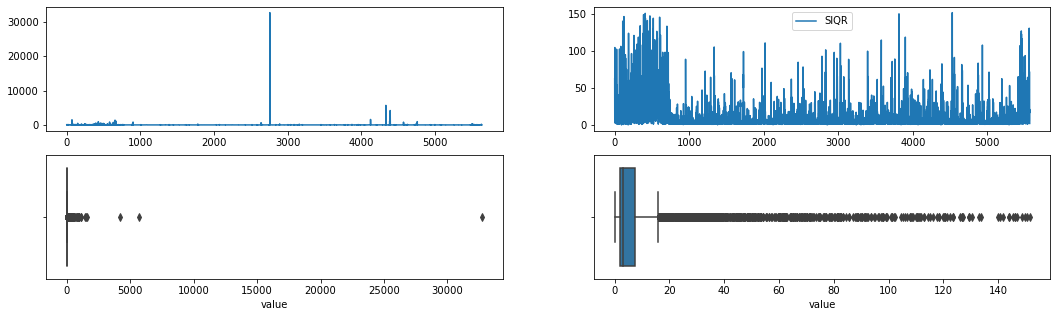

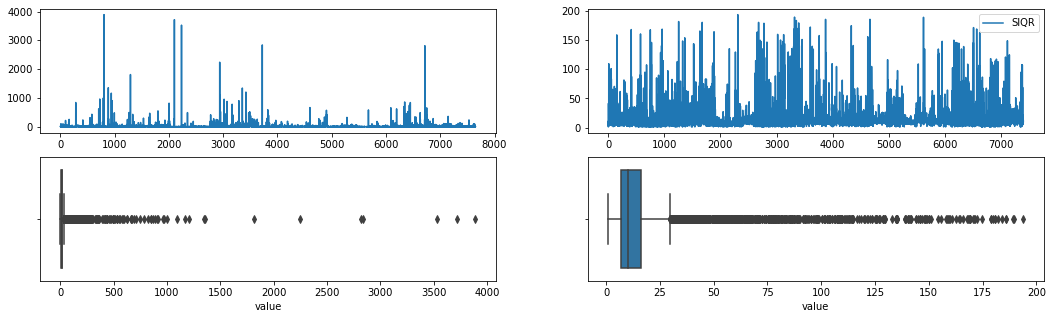

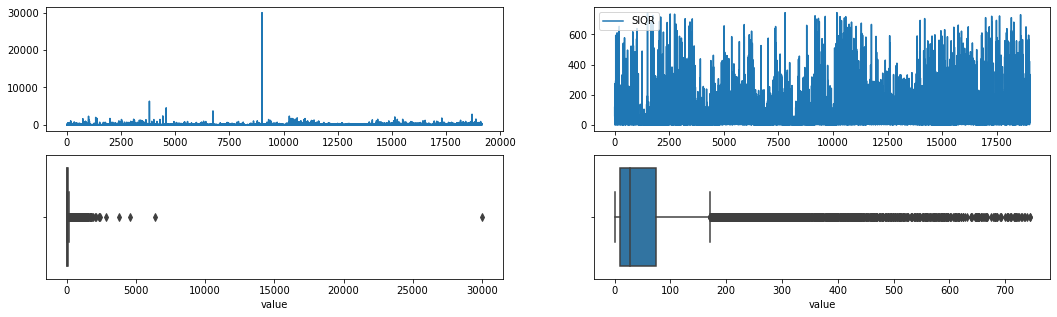

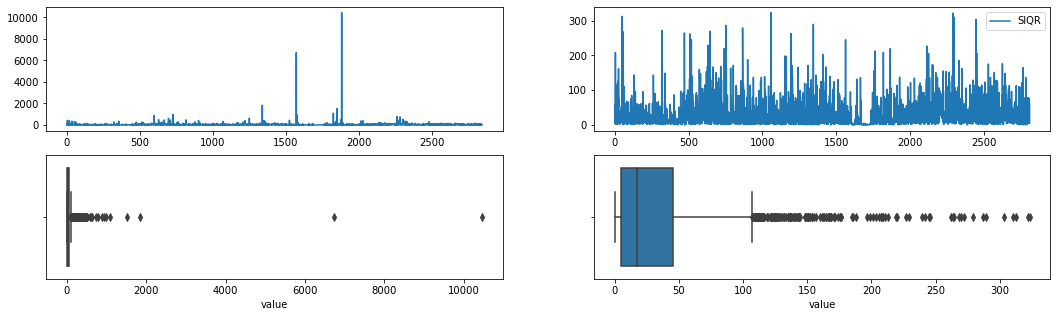

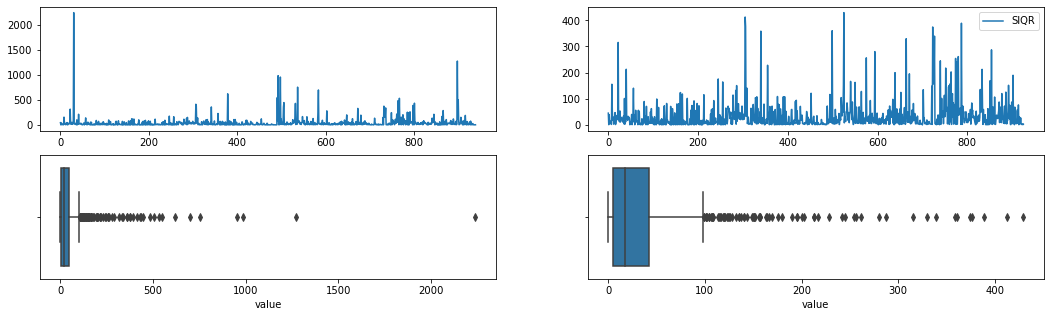

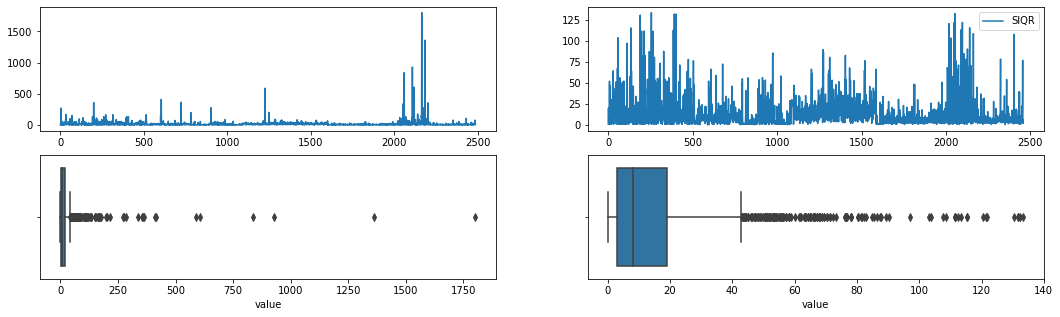

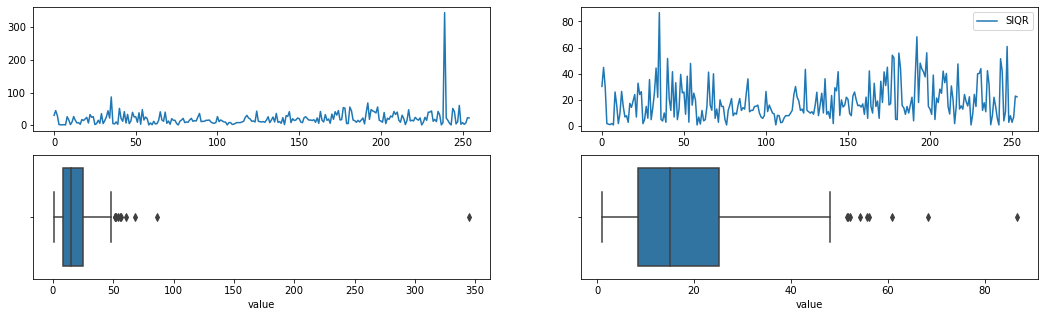

In [50]:
def detect_outliers(data, iqr, siqr):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q2 = np.percentile(data, 50)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    if iqr:
        IQR = q3-q1
        lwr_bound = q1-(1.5*IQR)
        upr_bound = q3+(1.5*IQR)
    if siqr:
        siqr_high = q3-q2
        siqr_low = q2-q1
        upr_bound = q3 + 3 * siqr_high
        lwr_bound = q1 - 3 * siqr_low
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code

for var in data.variable.unique()[7:]:
    var_data = data[data.variable == var].reset_index(drop=True)
    # var_data = var_data[var_data.value > 300].reset_index(drop=True)
    data1 = sorted(var_data.value.values)
    q1 = np.percentile(data1, 25)
    q2 = np.percentile(data1, 50)
    q3 = np.percentile(data1, 95)

    # sample_outliers_iqr = detect_outliers(data=var_data.value, iqr=True, siqr=False)
    # sample_outliers_siqr = detect_outliers(data=var_data.value, iqr=False, siqr=True)
    # print('-------------------------------')
    # print('count of {}: {}'.format(var, len(var_data)))
    # print('amount of outliers iqr: {}'.format(len(sample_outliers_iqr)))
    # print('amount of outliers siqr: {}'.format(len(sample_outliers_siqr)))

    df_siqr = var_data[~((var_data.value<(q2-3*(q2-q1))) | (var_data.value>(q2+3*(q3-q2))))].reset_index(drop=True)

    print('Variable: {}'.format(var))
    fig, axs = plt.subplots(2,2, figsize=(18,5))
        
    # left plot
    ax = axs[0,0]
    ax.plot(var_data.value, label='No correction')

    # right plot
    ax = axs[0,1]
    ax.plot(df_siqr.value, label='SIQR')
    ax.legend()

    ax = axs[1,0]
    sns.boxplot(data=var_data, x=var_data.value, sym="red", ax=ax)

    ax = axs[1,1]
    sns.boxplot(data=df_siqr, x=df_siqr.value, ax=ax)

    for ax in axs:
        # ax.grid()
        # ax.set_title('{}'.format(var))
        pass



    # count = len(var_data)
    # nan_count = var_data.value.isna().sum()
    # print('{} count: {} & NaN count: {}'.format(var, count, nan_count))

    # fig, ax = plt.subplots(figsize=(20,6))
    # sns.boxplot(data=var_data, x=var_data.value, sym="red")
    # plt.show()

    # sns.displot(data=var_data, x=var_data.value)
    # plt.show()



### Data Cleaning

#### Notes:
    - Step 1:
        -           